In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Previous_app dataset
file_path2 = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/Report/previous_app.csv"
previous_app = pd.read_csv(file_path2, header='infer')

# Load Current_app dataset
file_path1 = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/Report/current_app.csv"
current_app = pd.read_csv(file_path1, header='infer')

In [ ]:
import warnings

# Suppress the SettingWithCopyWarning
warnings.filterwarnings("ignore", category=UserWarning, module='pandas')

# Data Understanding

In [ ]:
previous_app.shape

(1670214, 37)

In [ ]:
len(previous_app.columns)

37

In [ ]:
current_app.shape

(307511, 122)

In [ ]:
len(current_app.columns)

122

In [ ]:
# List of numerical columns of dataset :'current_app'
numerical_columns = [
    'TARGET', 'SK_ID_CURR',  'CNT_CHILDREN',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
    'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
    'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
    'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
    'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
    'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE',
    'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
    'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
    'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
    'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
     'TOTALAREA_MODE',  'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'
]

# Create a summary DataFrame
def summarize_missing_values(df, columns):
    # Filter the DataFrame to include only the numerical columns
    df_filtered = df[columns]

    # Initialize lists to store the summary information
    attributes = []
    datatypes = []
    missing_counts = []
    missing_percentages = []

    # Iterate over each column in the filtered dataframe
    for col in df_filtered.columns:
        attributes.append(col)
        datatypes.append(df_filtered[col].dtype)
        missing_count = df_filtered[col].isna().sum()
        missing_counts.append(missing_count)
        missing_percentage = (missing_count / len(df_filtered)) * 100
        missing_percentages.append(round(missing_percentage, 2))  # Round to 2 decimal places

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Attribute': attributes,
        'Datatype': datatypes,
        'No. of Missing Values': missing_counts,
        'Percentage of Missing Values': missing_percentages
    })

    return summary_df

# Generate the summary table
summary_table = summarize_missing_values(current_app, numerical_columns)

# Display the summary table
print(summary_table)

# Save the summary table to a CSV file
summary_file_path = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/summary_table_current.xlsx"
summary_table.to_csv(summary_file_path, index=False)

print(f"Summary table saved to {summary_file_path}")


                      Attribute Datatype  No. of Missing Values  \
0                        TARGET    int64                      0   
1                    SK_ID_CURR    int64                      0   
2                  CNT_CHILDREN    int64                      0   
3              AMT_INCOME_TOTAL  float64                      0   
4                    AMT_CREDIT  float64                      0   
..                          ...      ...                    ...   
102   AMT_REQ_CREDIT_BUREAU_DAY  float64                  41519   
103  AMT_REQ_CREDIT_BUREAU_WEEK  float64                  41519   
104   AMT_REQ_CREDIT_BUREAU_MON  float64                  41519   
105   AMT_REQ_CREDIT_BUREAU_QRT  float64                  41519   
106  AMT_REQ_CREDIT_BUREAU_YEAR  float64                  41519   

     Percentage of Missing Values  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4              

In [ ]:
# List of categorical columns of dataset :'current_app'
categorical_columns = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'WEEKDAY_APPR_PROCESS_START', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE', 'ORGANIZATION_TYPE','FONDKAPREMONT_MODE', 'HOUSETYPE_MODE','WALLSMATERIAL_MODE',
    'EMERGENCYSTATE_MODE'
]

# Create a summary DataFrame
def summarize_categorical_columns(df, columns):
    # Filter the DataFrame to include only the specified columns
    df_filtered = df[columns]

    # Initialize lists to store the summary information
    attributes = []
    datatypes = []
    unique_counts = []
    unique_values = []
    missing_counts = []
    missing_percentages = []

    # Iterate over each column in the filtered dataframe
    for col in df_filtered.columns:
        attributes.append(col)
        # Get the datatype of the column
        datatypes.append(df_filtered[col].dtype.name)
        unique_count = df_filtered[col].nunique()
        unique_counts.append(unique_count)
        unique_value_list = df_filtered[col].dropna().unique().tolist()
        unique_values.append(unique_value_list)
        missing_count = df_filtered[col].isna().sum()
        missing_counts.append(missing_count)
        missing_percentage = (missing_count / len(df_filtered)) * 100
        missing_percentages.append(round(missing_percentage, 2))  # Round to 2 decimal places

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Attribute': attributes,
        'Datatype': datatypes,
        'No. of Unique Variables': unique_counts,
        'List of Unique Variables': unique_values,
        'No. of Missing Values': missing_counts,
        'Percentage of Missing Values': missing_percentages
    })

    return summary_df

# Generate the summary table
summary_table = summarize_categorical_columns(current_app, categorical_columns)

# Display the summary table
print(summary_table)

# Save the summary table to a CSV file
summary_file_path = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/categorical_summary_table_current.xlsx"
summary_table.to_csv(summary_file_path, index=False)

print(f"Summary table saved to {summary_file_path}")


                     Attribute Datatype  No. of Unique Variables  \
0           NAME_CONTRACT_TYPE   object                        2   
1                  CODE_GENDER   object                        3   
2                 FLAG_OWN_CAR   object                        2   
3              FLAG_OWN_REALTY   object                        2   
4   WEEKDAY_APPR_PROCESS_START   object                        7   
5              NAME_TYPE_SUITE   object                        7   
6             NAME_INCOME_TYPE   object                        8   
7          NAME_EDUCATION_TYPE   object                        5   
8           NAME_FAMILY_STATUS   object                        6   
9            NAME_HOUSING_TYPE   object                        6   
10             OCCUPATION_TYPE   object                       18   
11           ORGANIZATION_TYPE   object                       58   
12          FONDKAPREMONT_MODE   object                        4   
13              HOUSETYPE_MODE   object         

In [ ]:
# List of numerical columns of dataset :'previous_app'
numerical_columns = [
    'SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
    'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
     'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
    'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
    'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
    'NFLAG_INSURED_ON_APPROVAL'
]

# Create a summary DataFrame
def summarize_numerical_columns(df, columns):
    # Filter the DataFrame to include only the specified columns
    df_filtered = df[columns]

    # Initialize lists to store the summary information
    attributes = []
    datatypes = []
    missing_counts = []
    missing_percentages = []

    # Iterate over each column in the filtered dataframe
    for col in df_filtered.columns:
        attributes.append(col)
        # Get the datatype of the column
        datatypes.append(df_filtered[col].dtype.name)
        missing_count = df_filtered[col].isna().sum()
        missing_counts.append(missing_count)
        missing_percentage = (missing_count / len(df_filtered)) * 100
        missing_percentages.append(round(missing_percentage, 2))  # Round to 2 decimal places

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Attribute': attributes,
        'Datatype': datatypes,
        'No. of Missing Values': missing_counts,
        'Percentage of Missing Values': missing_percentages
    })

    return summary_df

# Generate the summary table
summary_table = summarize_numerical_columns(previous_app, numerical_columns)

# Display the summary table
print(summary_table)

# Save the summary table to a CSV file
summary_file_path = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/numerical_summary_table_previous.xlsx"
summary_table.to_csv(summary_file_path, index=False)

print(f"Summary table saved to {summary_file_path}")


                    Attribute Datatype  No. of Missing Values  \
0                  SK_ID_PREV    int64                      0   
1                  SK_ID_CURR    int64                      0   
2                 AMT_ANNUITY  float64                 372235   
3             AMT_APPLICATION  float64                      0   
4                  AMT_CREDIT  float64                      1   
5            AMT_DOWN_PAYMENT  float64                 895844   
6             AMT_GOODS_PRICE  float64                 385515   
7     HOUR_APPR_PROCESS_START    int64                      0   
8      NFLAG_LAST_APPL_IN_DAY    int64                      0   
9           RATE_DOWN_PAYMENT  float64                 895844   
10      RATE_INTEREST_PRIMARY  float64                1664263   
11   RATE_INTEREST_PRIVILEGED  float64                1664263   
12              DAYS_DECISION    int64                      0   
13                CNT_PAYMENT  float64                 372230   
14         DAYS_FIRST_DRA

In [ ]:
# List of categorical columns of dataset :'previous_app'
categorical_columns = [
     'NAME_CONTRACT_TYPE', 'WEEKDAY_APPR_PROCESS_START',
    'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
    'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
    'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
    'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
    'PRODUCT_COMBINATION'
]

# Create a summary DataFrame
def summarize_categorical_columns(df, columns):
    # Filter the DataFrame to include only the specified columns
    df_filtered = df[columns]

    # Initialize lists to store the summary information
    attributes = []
    datatypes = []
    unique_counts = []
    unique_values = []
    missing_counts = []
    missing_percentages = []

    # Iterate over each column in the filtered dataframe
    for col in df_filtered.columns:
        attributes.append(col)
        # Get the datatype of the column
        datatypes.append(df_filtered[col].dtype.name)
        unique_count = df_filtered[col].nunique()
        unique_counts.append(unique_count)
        unique_value_list = df_filtered[col].dropna().unique().tolist()
        unique_values.append(unique_value_list)
        missing_count = df_filtered[col].isna().sum()
        missing_counts.append(missing_count)
        missing_percentage = (missing_count / len(df_filtered)) * 100
        missing_percentages.append(round(missing_percentage, 2))  # Round to 2 decimal places

    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Attribute': attributes,
        'Datatype': datatypes,
        'No. of Unique Variables': unique_counts,
        'List of Unique Variables': unique_values,
        'No. of Missing Values': missing_counts,
        'Percentage of Missing Values': missing_percentages
    })

    return summary_df

# Generate the summary table
summary_table = summarize_categorical_columns(previous_app, categorical_columns)

# Display the summary table
print(summary_table)

# Save the summary table to a CSV file
summary_file_path = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/categorical_summary_table_previous.xlsx"
summary_table.to_csv(summary_file_path, index=False)

print(f"Summary table saved to {summary_file_path}")

                      Attribute Datatype  No. of Unique Variables  \
0            NAME_CONTRACT_TYPE   object                        4   
1    WEEKDAY_APPR_PROCESS_START   object                        7   
2   FLAG_LAST_APPL_PER_CONTRACT   object                        2   
3        NAME_CASH_LOAN_PURPOSE   object                       25   
4          NAME_CONTRACT_STATUS   object                        4   
5             NAME_PAYMENT_TYPE   object                        4   
6            CODE_REJECT_REASON   object                        9   
7               NAME_TYPE_SUITE   object                        7   
8              NAME_CLIENT_TYPE   object                        4   
9           NAME_GOODS_CATEGORY   object                       28   
10               NAME_PORTFOLIO   object                        5   
11            NAME_PRODUCT_TYPE   object                        3   
12                 CHANNEL_TYPE   object                        8   
13         NAME_SELLER_INDUSTRY   

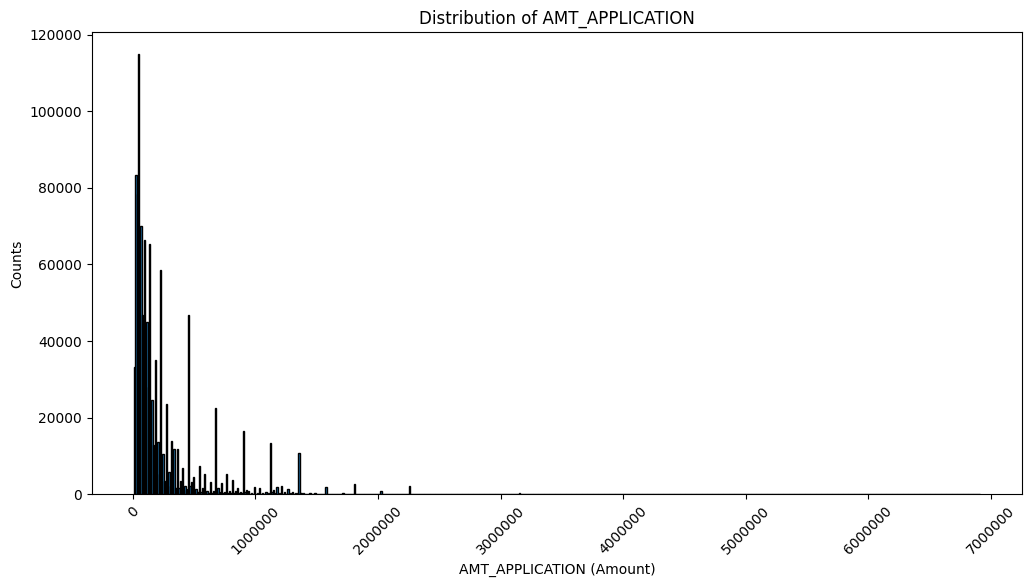

In [ ]:
# understanding attribute "AMT_APPLICATION" of previous_app
import matplotlib.pyplot as plt


# Define the bin ranges starting from 10,000
bin_ranges = np.arange(10000, previous_app['AMT_APPLICATION'].max() + 10000, 10000)

# Plotting the histogram with custom bins
plt.figure(figsize=(12, 6))
plt.hist(previous_app['AMT_APPLICATION'], bins=bin_ranges, edgecolor='black')

# Setting the labels and title
plt.xlabel('AMT_APPLICATION (Amount)')
plt.ylabel('Counts')
plt.title('Distribution of AMT_APPLICATION')

# Adjusting the x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Rotating the x-axis labels if necessary for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

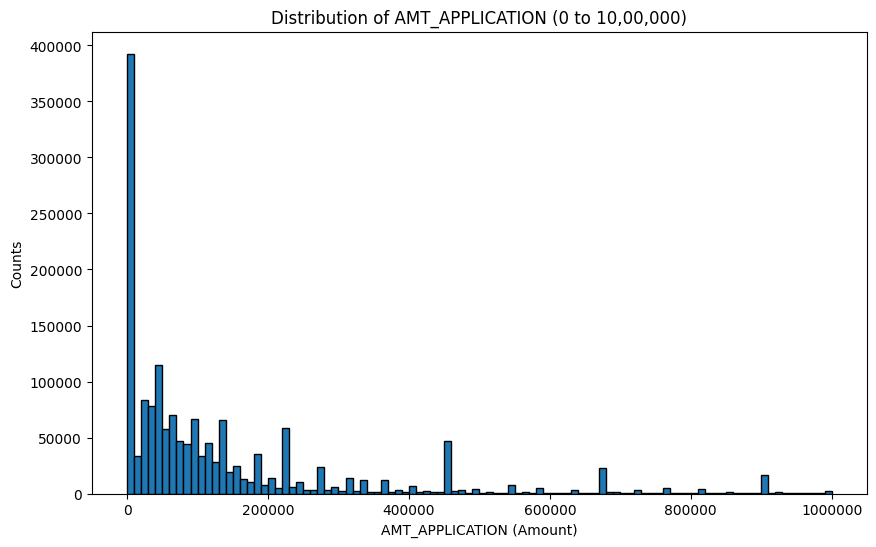

In [ ]:
# @title Distribution of AMT_APPLICATION Plot
# Filter the data to include only values between 0 and 150,000
filtered_data = previous_app[previous_app['AMT_APPLICATION'] <= 1000000]

# Define the bin ranges starting from 0 to 150,000, incrementing by 10,000
bin_ranges = np.arange(0, 1000000 + 10000, 10000)

# Plotting the histogram with custom bins
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['AMT_APPLICATION'], bins=bin_ranges, edgecolor='black')

# Setting the labels and title
plt.xlabel('AMT_APPLICATION (Amount)')
plt.ylabel('Counts')
plt.title('Distribution of AMT_APPLICATION (0 to 10,00,000)')

# Adjusting the x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Show the plot
plt.show()

In [ ]:
# List of numerical columns of dataset "previous_app"
numerical_columns = [
    'SK_ID_PREV', 'SK_ID_CURR', 'AMT_ANNUITY', 'AMT_APPLICATION',
    'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
    'HOUR_APPR_PROCESS_START', 'NFLAG_LAST_APPL_IN_DAY',
    'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
    'DAYS_DECISION', 'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
    'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
    'NFLAG_INSURED_ON_APPROVAL'
]

# Calculate the number of missing values for each numerical column
missing_values = previous_app[numerical_columns].isnull().sum()

# Display the missing values
print(missing_values)

SK_ID_PREV                         0
SK_ID_CURR                         0
AMT_ANNUITY                   372235
AMT_APPLICATION                    0
AMT_CREDIT                         1
AMT_DOWN_PAYMENT              895844
AMT_GOODS_PRICE               385515
HOUR_APPR_PROCESS_START            0
NFLAG_LAST_APPL_IN_DAY             0
RATE_DOWN_PAYMENT             895844
RATE_INTEREST_PRIMARY        1664263
RATE_INTEREST_PRIVILEGED     1664263
DAYS_DECISION                      0
CNT_PAYMENT                   372230
DAYS_FIRST_DRAWING            673065
DAYS_FIRST_DUE                673065
DAYS_LAST_DUE_1ST_VERSION     673065
DAYS_LAST_DUE                 673065
DAYS_TERMINATION              673065
NFLAG_INSURED_ON_APPROVAL     673065
dtype: int64


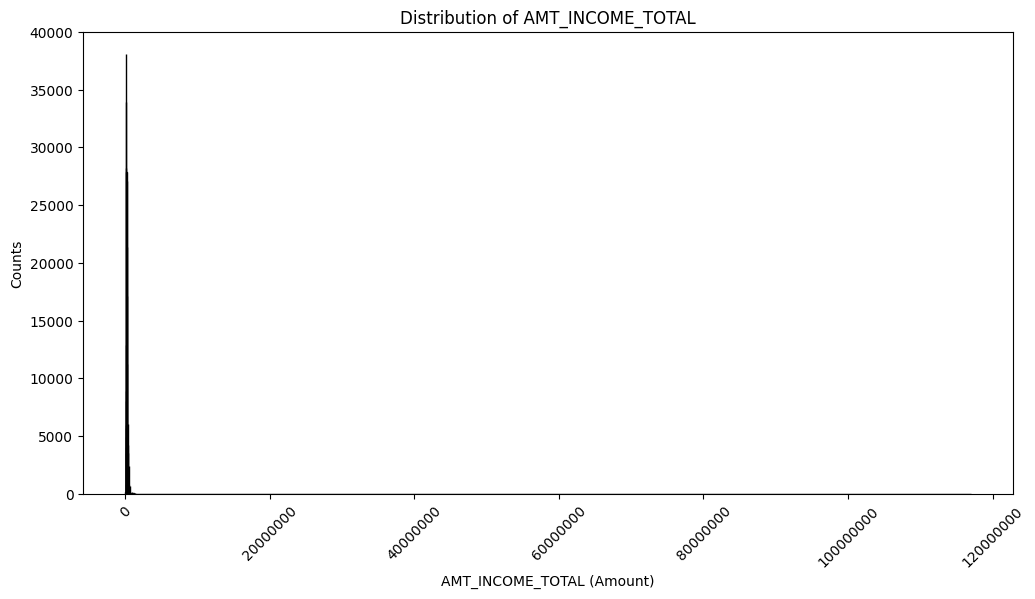

In [ ]:
# Define the bin ranges starting from 10,000
bin_ranges = np.arange(10000, current_app['AMT_INCOME_TOTAL'].max() + 10000, 10000)

# Plotting the histogram with custom bins
plt.figure(figsize=(12, 6))
plt.hist(current_app['AMT_INCOME_TOTAL'], bins=bin_ranges, edgecolor='black')

# Setting the labels and title
plt.xlabel('AMT_INCOME_TOTAL (Amount)')
plt.ylabel('Counts')
plt.title('Distribution of AMT_INCOME_TOTAL')

# Adjusting the x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Rotating the x-axis labels if necessary for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

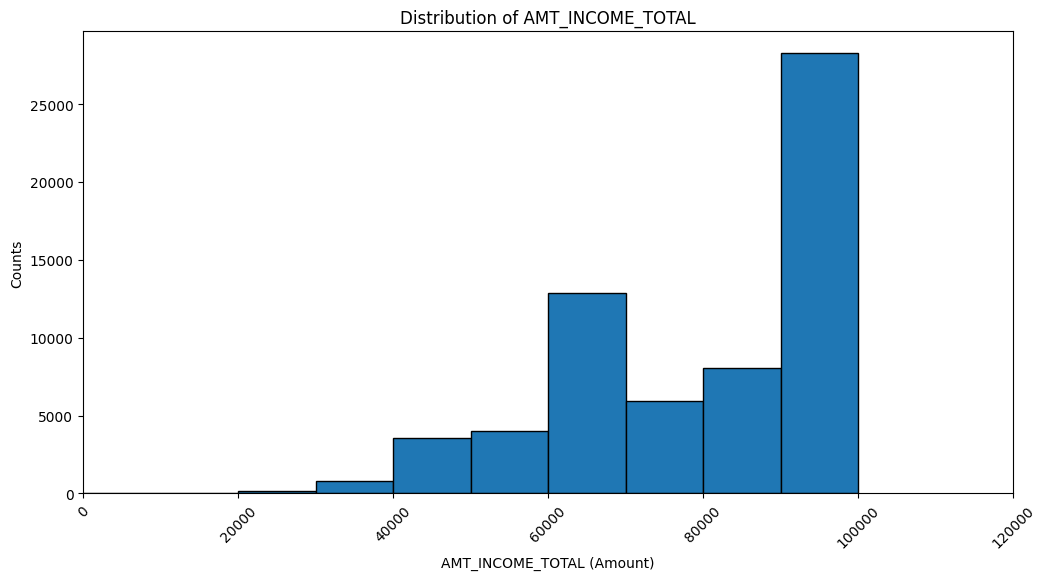

In [ ]:
# @title Distribution of AMT_INCOME_TOTAL
# Define the bin ranges from 0 to 100,000 with a step of 10,000
bin_ranges = np.arange(0, 100000 + 10000, 10000)

# Plotting the histogram with custom bins
plt.figure(figsize=(12, 6))
plt.hist(current_app['AMT_INCOME_TOTAL'], bins=bin_ranges, edgecolor='black')

# Setting the labels and title
plt.xlabel('AMT_INCOME_TOTAL (Amount)')
plt.ylabel('Counts')
plt.title('Distribution of AMT_INCOME_TOTAL')

# Setting x-axis limits to focus on the range between 0 and 100,000
plt.xlim(0, 120000)

# Adjusting the x-axis to avoid scientific notation
plt.ticklabel_format(style='plain', axis='x')

# Rotating the x-axis labels if necessary for readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


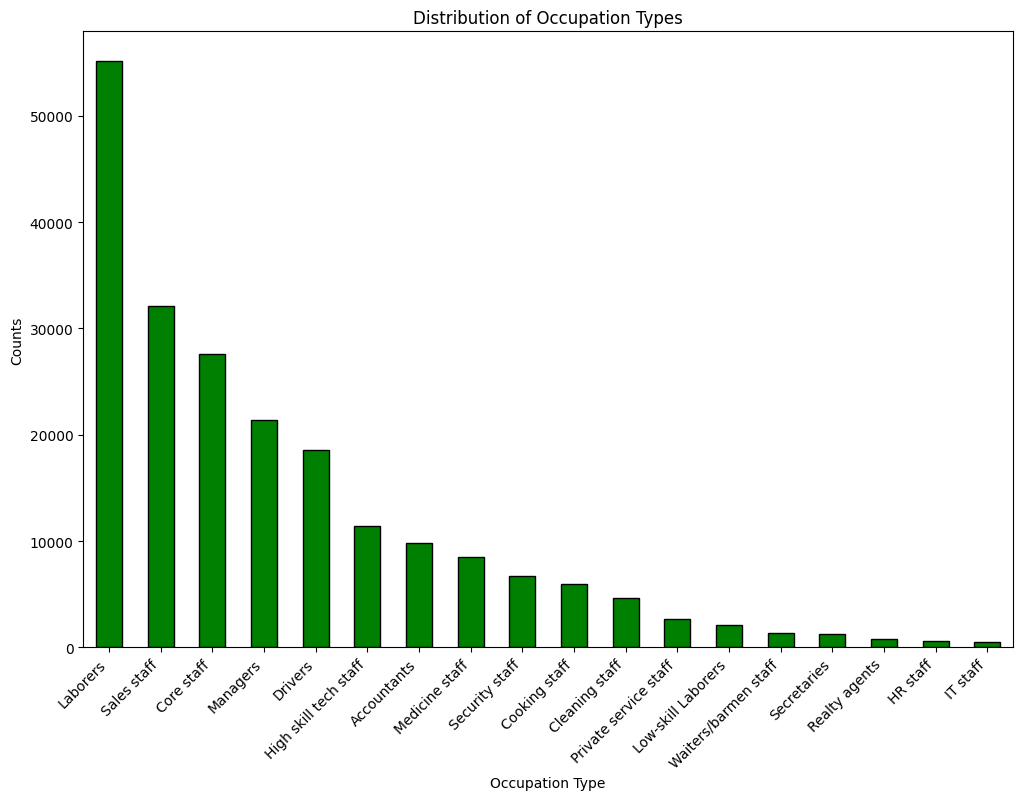

In [ ]:
# @title Distribution of Occupation Types
# Count the occurrences of each category in OCCUPATION_TYPE
occupation_counts = current_app['OCCUPATION_TYPE'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(12, 8))
occupation_counts.plot(kind='bar', color='green', edgecolor='black')

# Setting the labels and title
plt.xlabel('Occupation Type')
plt.ylabel('Counts')
plt.title('Distribution of Occupation Types')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

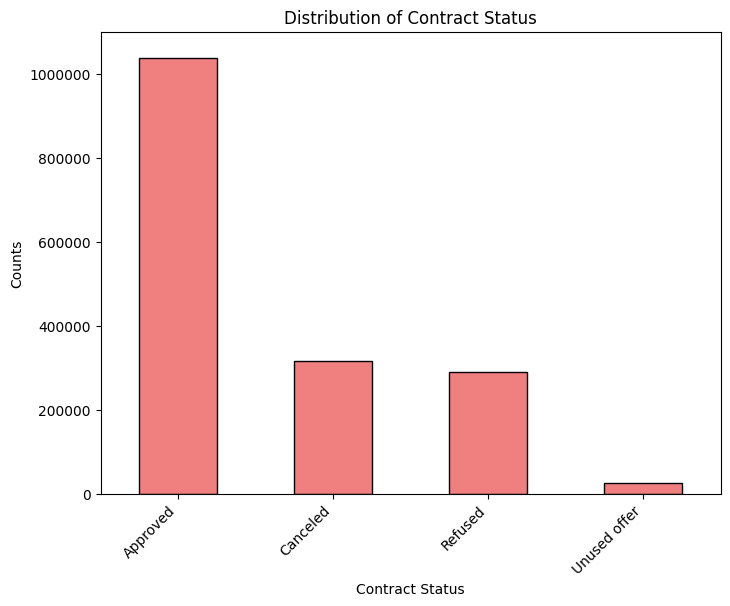

In [ ]:
# @title Distribution of Contract Status
# Assuming previous_app['NAME_CONTRACT_STATUS'] is a pandas Series
contract_status_counts = previous_app['NAME_CONTRACT_STATUS'].value_counts()

# Plotting the bar plot
plt.figure(figsize=(8, 6))
contract_status_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

# Setting the labels and title
plt.xlabel('Contract Status')
plt.ylabel('Counts')
plt.title('Distribution of Contract Status')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Setting y-axis limits (range) up to 1,100,000
plt.ylim(0, 1100000)

# Customizing y-axis ticks to show exact numbers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Show the plot
plt.show()

# Data Preparation

In [ ]:
# Get the 'SK_ID_PREV' column
sk_id_prev = previous_app['SK_ID_PREV']

# Calculate the number of unique values
num_unique = sk_id_prev.nunique()

# Calculate the number of repeated values
num_repeated = sk_id_prev.duplicated().sum()

# Display the summary
print(f"Number of unique 'SK_ID_PREV' values: {num_unique}")
print(f"Number of repeated 'SK_ID_PREV' values: {num_repeated}")

Number of unique 'SK_ID_PREV' values: 1670214
Number of repeated 'SK_ID_PREV' values: 0


In [ ]:
# Get the 'SK_ID_PREV' column
sk_id_prev = previous_app['SK_ID_CURR']

# Calculate the number of unique values
num_unique1 = sk_id_prev.nunique()

# Calculate the number of repeated values
num_repeated1 = sk_id_prev.duplicated().sum()

# Display the summary
print(f"Number of unique 'SK_ID_CURR' values: {num_unique1}")
print(f"Number of repeated 'SK_ID_CURR' values: {num_repeated1}")

Number of unique 'SK_ID_CURR' values: 338857
Number of repeated 'SK_ID_CURR' values: 1331357


In [ ]:
# Extract the SK_ID_CURR columns
previous_app_ids = set(previous_app['SK_ID_CURR'].unique())
current_app_ids = set(current_app['SK_ID_CURR'].unique())

# Find the common IDs
common_ids = previous_app_ids & current_app_ids

# Filter both datasets to keep only the rows with common SK_ID_CURR
filtered_previous_app = previous_app[previous_app['SK_ID_CURR'].isin(common_ids)]
filtered_current_app = current_app[current_app['SK_ID_CURR'].isin(common_ids)]

# Check the shapes of the filtered datasets
print(f"Filtered previous_app shape: {filtered_previous_app.shape}")
print(f"Filtered current_app shape: {filtered_current_app.shape}")

Filtered previous_app shape: (1413701, 37)
Filtered current_app shape: (291057, 122)


In [ ]:
# Step 1: Identify common SK_ID_CURR values between current_app and previous_app
common_sk_id_curr = current_app['SK_ID_CURR'].isin(previous_app['SK_ID_CURR'])

# Step 2: Filter current_app to keep only rows with SK_ID_CURR that are in both datasets
filtered_current_app = current_app[common_sk_id_curr].copy()

# Sort previous_app by 'SK_ID_CURR' and another time-related column, like 'SK_ID_PREV'
previous_app_sorted = previous_app.sort_values(by=['SK_ID_CURR', 'SK_ID_PREV'], ascending=[True, False])

# Drop duplicates, keeping the first occurrence (which will be the latest due to sorting)
filtered_previous_app = previous_app_sorted.drop_duplicates(subset=['SK_ID_CURR'], keep='first').copy()

# Step 4: Filter previous_app to keep only rows with SK_ID_CURR that are in both datasets
filtered_previous_app = filtered_previous_app[filtered_previous_app['SK_ID_CURR'].isin(filtered_current_app['SK_ID_CURR'])].copy()

# Output the results
print("Filtered current_app shape:", filtered_current_app.shape)
print("Filtered previous_app shape:", filtered_previous_app.shape)


Filtered current_app shape: (291057, 122)
Filtered previous_app shape: (291057, 37)


# **Handling missing values**

In [ ]:
filtered_current_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291057 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 273.1+ MB


In [ ]:
# Calculate the number of missing values in each column
missing_values = filtered_current_app.isnull().sum()

# Display columns with missing values and their counts
print("\nMissing Values in Each Column:")
for column in filtered_current_app.columns:
    print(f"{column}: {missing_values[column]} ")



Missing Values in Each Column:
SK_ID_CURR: 0 
TARGET: 0 
NAME_CONTRACT_TYPE: 0 
CODE_GENDER: 0 
FLAG_OWN_CAR: 0 
FLAG_OWN_REALTY: 0 
CNT_CHILDREN: 0 
AMT_INCOME_TOTAL: 0 
AMT_CREDIT: 0 
AMT_ANNUITY: 12 
AMT_GOODS_PRICE: 267 
NAME_TYPE_SUITE: 787 
NAME_INCOME_TYPE: 0 
NAME_EDUCATION_TYPE: 0 
NAME_FAMILY_STATUS: 0 
NAME_HOUSING_TYPE: 0 
REGION_POPULATION_RELATIVE: 0 
DAYS_BIRTH: 0 
DAYS_EMPLOYED: 0 
DAYS_REGISTRATION: 0 
DAYS_ID_PUBLISH: 0 
OWN_CAR_AGE: 192561 
FLAG_MOBIL: 0 
FLAG_EMP_PHONE: 0 
FLAG_WORK_PHONE: 0 
FLAG_CONT_MOBILE: 0 
FLAG_PHONE: 0 
FLAG_EMAIL: 0 
OCCUPATION_TYPE: 91240 
CNT_FAM_MEMBERS: 0 
REGION_RATING_CLIENT: 0 
REGION_RATING_CLIENT_W_CITY: 0 
WEEKDAY_APPR_PROCESS_START: 0 
HOUR_APPR_PROCESS_START: 0 
REG_REGION_NOT_LIVE_REGION: 0 
REG_REGION_NOT_WORK_REGION: 0 
LIVE_REGION_NOT_WORK_REGION: 0 
REG_CITY_NOT_LIVE_CITY: 0 
REG_CITY_NOT_WORK_CITY: 0 
LIVE_CITY_NOT_WORK_CITY: 0 
ORGANIZATION_TYPE: 0 
EXT_SOURCE_1: 163839 
EXT_SOURCE_2: 580 
EXT_SOURCE_3: 57188 
APARTMENTS

In [ ]:
filtered_current_app.shape

(291057, 122)

In [ ]:
# Calculate percentage of missing values for each column
missing_percentage = filtered_current_app.isnull().sum() / len(current_app) * 100

# Identify columns with more than 40% missing values
columns_to_drop = missing_percentage[missing_percentage > 40].index.tolist()

# Drop the columns from the dataframe
filtered_current_app.drop(columns_to_drop, axis=1, inplace=True)

# Confirm columns have been dropped
print(filtered_current_app.columns)


Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [ ]:
# Dropping unnecessary columns

columns_to_drop = [
    'FLAG_MOBIL','FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
    'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
    'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
    'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
    'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE','FLAG_EMP_PHONE','FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','EXT_SOURCE_2','EXT_SOURCE_3','AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY','DAYS_REGISTRATION','HOUR_APPR_PROCESS_START','REGION_POPULATION_RELATIVE',
    'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'DAYS_ID_PUBLISH','DAYS_BIRTH',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]
# Drop the columns from the dataframe
filtered_current_app.drop(columns_to_drop, axis=1, inplace=True)

# Confirm columns have been dropped
print(filtered_current_app.columns)

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'DAYS_EMPLOYED', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE'],
      dtype='object')


In [ ]:
filtered_current_app.shape

(291057, 23)

In [ ]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.3 MB/s eta 0:00:00


In [ ]:
filtered_current_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,NAME_HOUSING_TYPE,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,House / apartment,-637,Laborers,1.0,2,2,WEDNESDAY,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,House / apartment,-1188,Core staff,2.0,1,1,MONDAY,0,0,School
2,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,House / apartment,-225,Laborers,1.0,2,2,MONDAY,0,0,Government
3,100006,0,Cash loans,F,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,House / apartment,-3039,Laborers,2.0,2,2,WEDNESDAY,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,House / apartment,-3038,Core staff,1.0,2,2,THURSDAY,1,1,Religion


In [ ]:
# Read the CSV file
#filtered_current_app = pd.read_csv(file_path1, header='infer')

# List of columns to check
columns_to_check = [
    'SK_ID_CURR', 'SK_ID_PREV', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'
]

# Get the columns in the current_app dataframe
current_app_columns = filtered_current_app.columns

# Check if each column in the list is present in the dataframe's columns
missing_columns = [col for col in columns_to_check if col not in current_app_columns]

if missing_columns:
    print(f"The following columns are missing: {missing_columns}")
else:
    print("All columns are present.")

The following columns are missing: ['SK_ID_PREV', 'AMT_APPLICATION', 'AMT_DOWN_PAYMENT', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


(291057, 40)

In [ ]:
# Check for missing values
print("\nMissing values in current_app dataset:")
print(filtered_current_app.isnull().sum())



Missing values in current_app dataset:
SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  267
NAME_TYPE_SUITE                  787
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
DAYS_EMPLOYED                      0
OCCUPATION_TYPE                91240
CNT_FAM_MEMBERS                    0
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
WEEKDAY_APPR_PROCESS_START         0
REG_CITY_NOT_WORK_CITY             0
LIVE_CITY_NOT_WORK_CITY            0
ORGANIZATION_TYPE                  0
dtype: int64


In [ ]:
print(filtered_current_app.info())

<class 'pandas.core.frame.DataFrame'>
Index: 291057 entries, 0 to 307510
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   291057 non-null  int64  
 1   TARGET                       291057 non-null  int64  
 2   NAME_CONTRACT_TYPE           291057 non-null  object 
 3   CODE_GENDER                  291057 non-null  object 
 4   CNT_CHILDREN                 291057 non-null  int64  
 5   AMT_INCOME_TOTAL             291057 non-null  float64
 6   AMT_CREDIT                   291057 non-null  float64
 7   AMT_ANNUITY                  291045 non-null  float64
 8   AMT_GOODS_PRICE              290790 non-null  float64
 9   NAME_TYPE_SUITE              290270 non-null  object 
 10  NAME_INCOME_TYPE             291057 non-null  object 
 11  NAME_EDUCATION_TYPE          291057 non-null  object 
 12  NAME_FAMILY_STATUS           291057 non-null  object 
 13  NAME

In [ ]:
def balance_columns(column_names, dataframe):
    for column_name in column_names:
        #print(f"\n\n--- Balancing {column_name} ---")

        # Step 1: Handle Missing Values
        dataframe.loc[:, column_name].fillna(dataframe[column_name].median(), inplace=True)

        # Step 2: Handle Outliers
        def cap_outliers(series, lower_percentile=0.01, upper_percentile=0.99):
            lower_bound = series.quantile(lower_percentile)
            upper_bound = series.quantile(upper_percentile)
            return np.clip(series, lower_bound, upper_bound)

        dataframe.loc[:, column_name] = cap_outliers(dataframe[column_name])

# List of columns to handle
columns_to_balance = [
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE'
]

# Balance the columns
balance_columns(columns_to_balance, filtered_current_app)
# Check for Missing Values after processing
print("\nMissing Values in the Specified Columns:")
print(filtered_current_app[columns_to_balance].isnull().sum())



Missing Values in the Specified Columns:
AMT_ANNUITY        0
AMT_GOODS_PRICE    0
dtype: int64


In [ ]:
# Replace missing values in 'NAME_TYPE_SUITE' and 'OCCUPATION_TYPE' with 'Unknown' using .loc[] to ensure proper assignment
filtered_current_app.loc[:, ['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']] = filtered_current_app[['NAME_TYPE_SUITE', 'OCCUPATION_TYPE']].fillna('Unknown')

# Check the number of missing values after replacement
missing_values_count_suite = filtered_current_app['NAME_TYPE_SUITE'].isnull().sum()
missing_values_count_occupation = filtered_current_app['OCCUPATION_TYPE'].isnull().sum()

# Display the results
print(f"Number of missing values in 'NAME_TYPE_SUITE' after replacement: {missing_values_count_suite}")
print(f"Number of missing values in 'OCCUPATION_TYPE' after replacement: {missing_values_count_occupation}")


Number of missing values in 'NAME_TYPE_SUITE' after replacement: 0
Number of missing values in 'OCCUPATION_TYPE' after replacement: 0


In [ ]:
# Check the number of missing values and unique values in 'OCCUPATION_TYPE' and 'NAME_TYPE_SUITE'
missing_values_suite = filtered_current_app['NAME_TYPE_SUITE'].isnull().sum()
missing_values_occupation = filtered_current_app['OCCUPATION_TYPE'].isnull().sum()

unique_values_suite = filtered_current_app['NAME_TYPE_SUITE'].unique()
unique_values_occupation = filtered_current_app['OCCUPATION_TYPE'].unique()

# Display the results
print(f"Number of missing values in 'NAME_TYPE_SUITE': {missing_values_suite}")
print(f"Unique values in 'NAME_TYPE_SUITE': {unique_values_suite}")

print(f"Number of missing values in 'OCCUPATION_TYPE': {missing_values_occupation}")
print(f"Unique values in 'OCCUPATION_TYPE': {unique_values_occupation}")


Number of missing values in 'NAME_TYPE_SUITE': 0
Unique values in 'NAME_TYPE_SUITE': ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A'
 'Group of people' 'Other_B' 'Unknown']
Number of missing values in 'OCCUPATION_TYPE': 0
Unique values in 'OCCUPATION_TYPE': ['Laborers' 'Core staff' 'Accountants' 'Managers' 'Unknown' 'Drivers'
 'Sales staff' 'Cleaning staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'Cooking staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']


In [ ]:
# Impute missing values with the mode for 'CNT_FAM_MEMBERS'
cnt_fam_members_mode = filtered_current_app['CNT_FAM_MEMBERS'].mode()[0]
filtered_current_app['CNT_FAM_MEMBERS'].fillna(cnt_fam_members_mode, inplace=True)

# Check and print the number of missing values after imputation
missing_values_cnt_fam_members = filtered_current_app['CNT_FAM_MEMBERS'].isnull().sum()

print(f"Number of missing values in 'CNT_FAM_MEMBERS' after imputation: {missing_values_cnt_fam_members}")


Number of missing values in 'CNT_FAM_MEMBERS' after imputation: 0


In [ ]:
filtered_current_app.shape

(291057, 23)

In [ ]:
# Check the dataset before converting negative values to absolute values
print("Before converting to absolute values:")
print(filtered_current_app[columns_to_convert].describe())


Before converting to absolute values:
       DAYS_EMPLOYED
count  291057.000000
mean    67956.418145
std    139623.384645
min         0.000000
25%       952.000000
50%      2239.000000
75%      5739.000000
max    365243.000000


In [ ]:
print("\nMissing values in previous_app dataset:")
print(filtered_current_app.isnull().sum())


Missing values in previous_app dataset:
SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
DAYS_EMPLOYED                  0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
REG_CITY_NOT_WORK_CITY         0
LIVE_CITY_NOT_WORK_CITY        0
ORGANIZATION_TYPE              0
dtype: int64


In [ ]:
# Specify the file path
file_path2 = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/Report/filtered_current_app.csv"

# Save the DataFrame to a CSV file
filtered_current_app.to_csv(file_path2, index=False)

print(f"DataFrame saved to {file_path2}")


DataFrame saved to /content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/Report/filtered_current_app.csv


In [ ]:
# Check for missing values
print("\nMissing values in previous_app dataset:")
print(filtered_previous_app.isnull().sum())


Missing values in previous_app dataset:
SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     46388
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               116881
AMT_GOODS_PRICE                 48961
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              116881
RATE_INTEREST_PRIMARY          289468
RATE_INTEREST_PRIVILEGED       289468
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                141335
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_T

In [ ]:
# Specify the file path
file_path2 = "/content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/Report/filtered_previous_app.csv"

# Save the DataFrame to a CSV file
filtered_previous_app.to_csv(file_path2, index=False)

print(f"DataFrame saved to {file_path2}")


DataFrame saved to /content/drive/MyDrive/UP2205708 (Major Project)MSc Data Analytics/Report/filtered_previous_app.csv
